In [1]:
# 交易网络的结构motifs和交易的余额变化时间序列的shapelets共同分类
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
shapelets_features = pd.read_csv('./datasets/shapelets_features.csv')
shapelets_features.columns = ['address', 'shapelet0', 'shapelet1', 'shapelet2', 'shapelet3', 'shapelet4', 'shapelet5', 'shapelet6', 'shapelet7', 'shapelet8', 'shapelet9', 'shapelet10', 'shapelet11', 'shapelet12', 'shapelet13', 'shapelet14', 'label']
shapelets_features.head()

,address,shapelet0,shapelet1,shapelet2,shapelet3,shapelet4,shapelet5,shapelet6,shapelet7,shapelet8,shapelet9,shapelet10,shapelet11,shapelet12,shapelet13,shapelet14,label
0,0x002bf459dc58584d58886169ea0e80f3ca95ffaf,0.050473,6.634261,5.988260,2.803635,0.799289,1.94569,0.221186,7.257098,0.084964,5.244766,6697.312677,0.338345,0.082171,2.735242,0.823799,0
1,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0.050480,6.634261,5.988260,2.803635,0.823563,1.94569,0.221186,7.257098,0.084965,5.244766,6697.328192,0.338345,0.082175,2.735242,0.823799,0
2,0x0059b14e35dab1b4eee1e2926c7a5660da66f747,0.591340,5.655286,6.498611,2.912674,1.192823,2.00001,0.599845,6.681451,0.515605,4.385881,6697.824909,0.681533,0.617439,2.189384,1.014110,0
3,0x0061fb5485dff4bb85c078dca80d19119224d97e,0.050516,6.634261,5.988264,2.803635,1.001982,1.94569,0.221190,7.045676,0.084969,5.244766,6696.942751,0.338345,0.082196,2.735242,0.823799,0
4,0x00650a784ee109797ba8c05f3496bdbf2b2b7a1c,0.050436,6.634261,5.988249,2.803635,1.001806,1.94569,0.221187,7.257098,0.084956,5.244766,6697.344891,0.338345,0.082108,2.735242,0.823799,0


In [3]:
graphlets_features = pd.read_csv('./datasets/graphlets_features_old.csv')
graphlets_features.head()

,address,in_degree,out_degree,max_timestamp,min_timestamp,value_out,value_in,balance,count,label,...,motif3,motif4,motif1_ratio,motif2_ratio,motif3_ratio,motif4_ratio,motif1_00_ratio,motif1_01_ratio,motif1_10_ratio,motif1_11_ratio
0,0x002bf459dc58584d58886169ea0e80f3ca95ffaf,4,4,1527595105,1527017753,1.532693,1.533785,-0.001092,4,0,...,10,0,0.500000,0.000000,0.500000,0.0,0.00000,0.00000,0.5,0.500
1,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,5,5,1529893144,1529873859,1.317896,1.318820,-0.000924,5,0,...,0,0,0.350000,0.650000,0.000000,0.0,1.00000,0.00000,0.0,0.000
2,0x0059b14e35dab1b4eee1e2926c7a5660da66f747,93,93,1521405323,1517019863,38.133767,37.556046,0.577721,101,0,...,2,0,0.029940,0.967066,0.002994,0.0,0.65000,0.35000,0.0,0.000
3,0x0061fb5485dff4bb85c078dca80d19119224d97e,12,12,1527854930,1526900270,1.000000,5.045869,-4.045869,12,0,...,0,0,0.111111,0.888889,0.000000,0.0,0.71875,0.15625,0.0,0.125
4,0x00650a784ee109797ba8c05f3496bdbf2b2b7a1c,4,4,1546665655,1539570132,0.679300,0.680000,-0.000700,3,0,...,10,0,0.500000,0.000000,0.500000,0.0,0.00000,0.00000,1.0,0.000


In [4]:
# 合并两个特征集，以address为key
features = pd.merge(graphlets_features, shapelets_features, on='address')
# 删除label_x列
features.drop('label_x', axis=1, inplace=True)
# 重命名label_y列
features.rename(columns={'label_y': 'label'}, inplace=True)
features.head()

,address,in_degree,out_degree,max_timestamp,min_timestamp,value_out,value_in,balance,count,motif1,...,shapelet6,shapelet7,shapelet8,shapelet9,shapelet10,shapelet11,shapelet12,shapelet13,shapelet14,label
0,0x002bf459dc58584d58886169ea0e80f3ca95ffaf,4,4,1527595105,1527017753,1.532693,1.533785,-0.001092,4,10,...,0.221186,7.257098,0.084964,5.244766,6697.312677,0.338345,0.082171,2.735242,0.823799,0
1,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,5,5,1529893144,1529873859,1.317896,1.318820,-0.000924,5,14,...,0.221186,7.257098,0.084965,5.244766,6697.328192,0.338345,0.082175,2.735242,0.823799,0
2,0x0059b14e35dab1b4eee1e2926c7a5660da66f747,93,93,1521405323,1517019863,38.133767,37.556046,0.577721,101,20,...,0.599845,6.681451,0.515605,4.385881,6697.824909,0.681533,0.617439,2.189384,1.014110,0
3,0x0061fb5485dff4bb85c078dca80d19119224d97e,12,12,1527854930,1526900270,1.000000,5.045869,-4.045869,12,32,...,0.221190,7.045676,0.084969,5.244766,6696.942751,0.338345,0.082196,2.735242,0.823799,0
4,0x00650a784ee109797ba8c05f3496bdbf2b2b7a1c,4,4,1546665655,1539570132,0.679300,0.680000,-0.000700,3,10,...,0.221187,7.257098,0.084956,5.244766,6697.344891,0.338345,0.082108,2.735242,0.823799,0


### 只使用features

In [5]:
# graphlets特征
key_features_name = ['balance','count', 'label']
key_features = features[key_features_name]
key_features.head()

,balance,count,label
0,-0.001092,4,0
1,-0.000924,5,0
2,0.577721,101,0
3,-4.045869,12,0
4,-0.000700,3,0


In [6]:
# 划分数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(key_features.iloc[:, :-1], key_features.iloc[:, -1], test_size=0.2, random_state=0)

# xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# 预测
y_pred = xgb_model.predict(X_test)

# 评估
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.95      0.90       338
           1       0.94      0.83      0.88       334

    accuracy                           0.89       672
   macro avg       0.89      0.89      0.89       672
weighted avg       0.89      0.89      0.89       672



ntree_limit is deprecated, use `iteration_range` or model slicing instead.


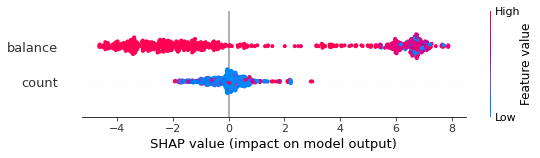

In [7]:
# SHAP解释样本

import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

shap.summary_plot(shap_values, X_test)


The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The `size` parameter has been renamed to `height`; please update your code.


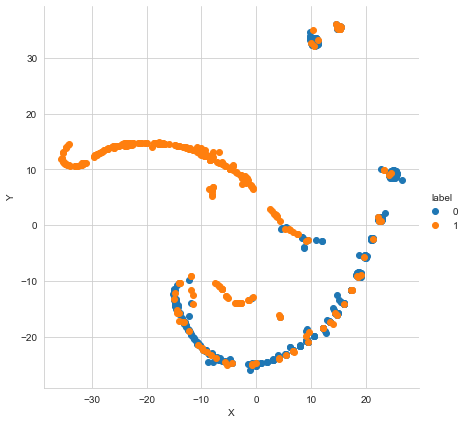

In [8]:
# 对特征画t-SNE图
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(X_test)

tsne_df = pd.DataFrame({'X': tsne_obj[:, 0], 'Y': tsne_obj[:, 1], 'label': y_test})

# 画图
import seaborn as sns

sns.set_style("whitegrid")
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "X", "Y").add_legend()
plt.show()


### 只使用graplets特征

In [9]:
# graphlets特征
key_features_name = ['motif1_ratio', 'motif2_ratio', 'motif3_ratio', 'motif1_00_ratio', 'motif1_01_ratio', 'motif1_10_ratio', 'motif1_11_ratio', 'label']
key_features = features[key_features_name]
key_features.head()

,motif1_ratio,motif2_ratio,motif3_ratio,motif1_00_ratio,motif1_01_ratio,motif1_10_ratio,motif1_11_ratio,label
0,0.500000,0.000000,0.500000,0.00000,0.00000,0.5,0.500,0
1,0.350000,0.650000,0.000000,1.00000,0.00000,0.0,0.000,0
2,0.029940,0.967066,0.002994,0.65000,0.35000,0.0,0.000,0
3,0.111111,0.888889,0.000000,0.71875,0.15625,0.0,0.125,0
4,0.500000,0.000000,0.500000,0.00000,0.00000,1.0,0.000,0


In [10]:
# 划分数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(key_features.iloc[:, :-1], key_features.iloc[:, -1], test_size=0.2, random_state=0)

# xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# 预测
y_pred = xgb_model.predict(X_test)

# 评估
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.72      0.75       338
           1       0.74      0.81      0.77       334

    accuracy                           0.76       672
   macro avg       0.76      0.76      0.76       672
weighted avg       0.76      0.76      0.76       672



ntree_limit is deprecated, use `iteration_range` or model slicing instead.


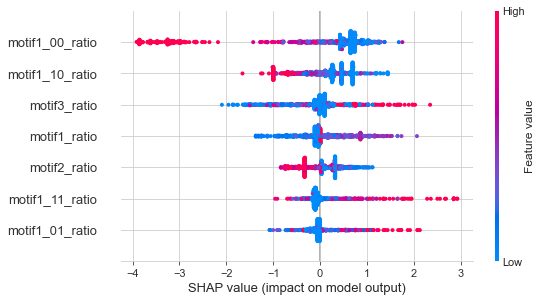

In [11]:
# SHAP解释样本

import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

shap.summary_plot(shap_values, X_test)


The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The `size` parameter has been renamed to `height`; please update your code.


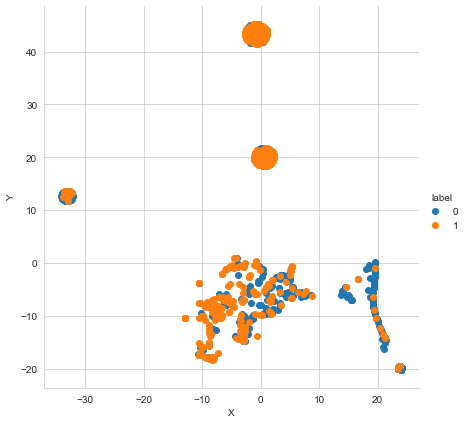

In [12]:
# 对特征画t-SNE图
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(X_test)

tsne_df = pd.DataFrame({'X': tsne_obj[:, 0], 'Y': tsne_obj[:, 1], 'label': y_test})

# 画图
import seaborn as sns

sns.set_style("whitegrid")
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "X", "Y").add_legend()
plt.show()


### 使用shapelets特征

In [13]:
# 定义要使用的特征
key_features_name = ['shapelet0', 'shapelet1', 'shapelet2', 'shapelet3', 'shapelet4', 'shapelet5', 'shapelet6', 'shapelet7', 'shapelet8', 'shapelet9', 'shapelet10', 'shapelet11', 'shapelet12', 'shapelet13', 'shapelet14', 'label']
key_features = features[key_features_name]
key_features.head()

,shapelet0,shapelet1,shapelet2,shapelet3,shapelet4,shapelet5,shapelet6,shapelet7,shapelet8,shapelet9,shapelet10,shapelet11,shapelet12,shapelet13,shapelet14,label
0,0.050473,6.634261,5.988260,2.803635,0.799289,1.94569,0.221186,7.257098,0.084964,5.244766,6697.312677,0.338345,0.082171,2.735242,0.823799,0
1,0.050480,6.634261,5.988260,2.803635,0.823563,1.94569,0.221186,7.257098,0.084965,5.244766,6697.328192,0.338345,0.082175,2.735242,0.823799,0
2,0.591340,5.655286,6.498611,2.912674,1.192823,2.00001,0.599845,6.681451,0.515605,4.385881,6697.824909,0.681533,0.617439,2.189384,1.014110,0
3,0.050516,6.634261,5.988264,2.803635,1.001982,1.94569,0.221190,7.045676,0.084969,5.244766,6696.942751,0.338345,0.082196,2.735242,0.823799,0
4,0.050436,6.634261,5.988249,2.803635,1.001806,1.94569,0.221187,7.257098,0.084956,5.244766,6697.344891,0.338345,0.082108,2.735242,0.823799,0


In [47]:
# 划分数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(key_features.iloc[:, :-1], key_features.iloc[:, -1], test_size=0.2, random_state=0)

# xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# 预测
y_pred = xgb_model.predict(X_test)

# 评估
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       338
           1       0.99      0.99      0.99       334

    accuracy                           0.99       672
   macro avg       0.99      0.99      0.99       672
weighted avg       0.99      0.99      0.99       672



ntree_limit is deprecated, use `iteration_range` or model slicing instead.


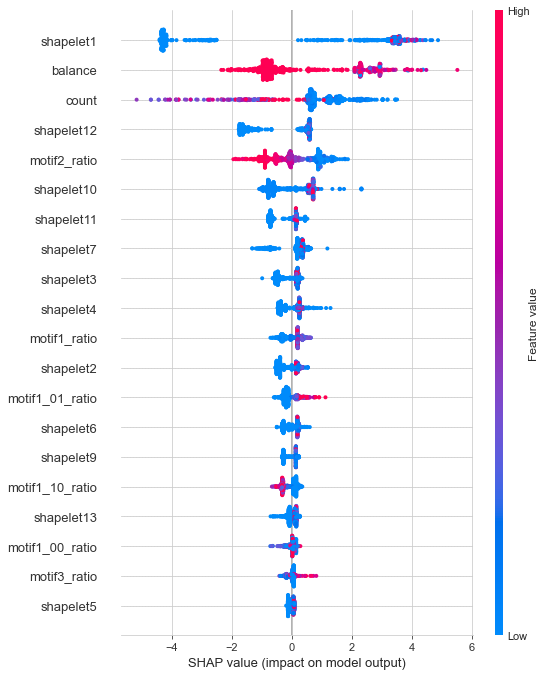

In [48]:
# SHAP解释样本

import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

shap.summary_plot(shap_values, X_test)


The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The `size` parameter has been renamed to `height`; please update your code.


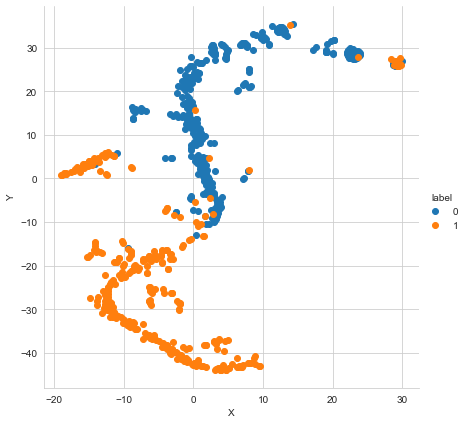

In [49]:
# 对特征画t-SNE图
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(X_test)

tsne_df = pd.DataFrame({'X': tsne_obj[:, 0], 'Y': tsne_obj[:, 1], 'label': y_test})

# 画图
import seaborn as sns

sns.set_style("whitegrid")
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "X", "Y").add_legend()
plt.show()


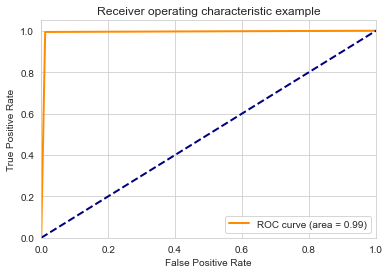

In [50]:
# ROC曲线
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 使用graphlets和shapelets特征

In [17]:
# 定义要使用的特征
key_features_name = ['motif1_ratio', 'motif2_ratio', 'motif3_ratio', 'motif1_00_ratio', 'motif1_01_ratio', 'motif1_10_ratio', 'motif1_11_ratio', 'shapelet0', 'shapelet1', 'shapelet2', 'shapelet3', 'shapelet4', 'shapelet5', 'shapelet6', 'shapelet7', 'shapelet8', 'shapelet9', 'shapelet10', 'shapelet11', 'shapelet12', 'shapelet13', 'shapelet14', 'label']
key_features = features[key_features_name]
key_features.head()

,motif1_ratio,motif2_ratio,motif3_ratio,motif1_00_ratio,motif1_01_ratio,motif1_10_ratio,motif1_11_ratio,shapelet0,shapelet1,shapelet2,...,shapelet6,shapelet7,shapelet8,shapelet9,shapelet10,shapelet11,shapelet12,shapelet13,shapelet14,label
0,0.500000,0.000000,0.500000,0.00000,0.00000,0.5,0.500,0.050473,6.634261,5.988260,...,0.221186,7.257098,0.084964,5.244766,6697.312677,0.338345,0.082171,2.735242,0.823799,0
1,0.350000,0.650000,0.000000,1.00000,0.00000,0.0,0.000,0.050480,6.634261,5.988260,...,0.221186,7.257098,0.084965,5.244766,6697.328192,0.338345,0.082175,2.735242,0.823799,0
2,0.029940,0.967066,0.002994,0.65000,0.35000,0.0,0.000,0.591340,5.655286,6.498611,...,0.599845,6.681451,0.515605,4.385881,6697.824909,0.681533,0.617439,2.189384,1.014110,0
3,0.111111,0.888889,0.000000,0.71875,0.15625,0.0,0.125,0.050516,6.634261,5.988264,...,0.221190,7.045676,0.084969,5.244766,6696.942751,0.338345,0.082196,2.735242,0.823799,0
4,0.500000,0.000000,0.500000,0.00000,0.00000,1.0,0.000,0.050436,6.634261,5.988249,...,0.221187,7.257098,0.084956,5.244766,6697.344891,0.338345,0.082108,2.735242,0.823799,0


In [18]:
# 划分数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(key_features.iloc[:, :-1], key_features.iloc[:, -1], test_size=0.2, random_state=0)

# xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# 预测
y_pred = xgb_model.predict(X_test)

# 评估
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       338
           1       0.98      0.99      0.98       334

    accuracy                           0.98       672
   macro avg       0.98      0.98      0.98       672
weighted avg       0.98      0.98      0.98       672



ntree_limit is deprecated, use `iteration_range` or model slicing instead.


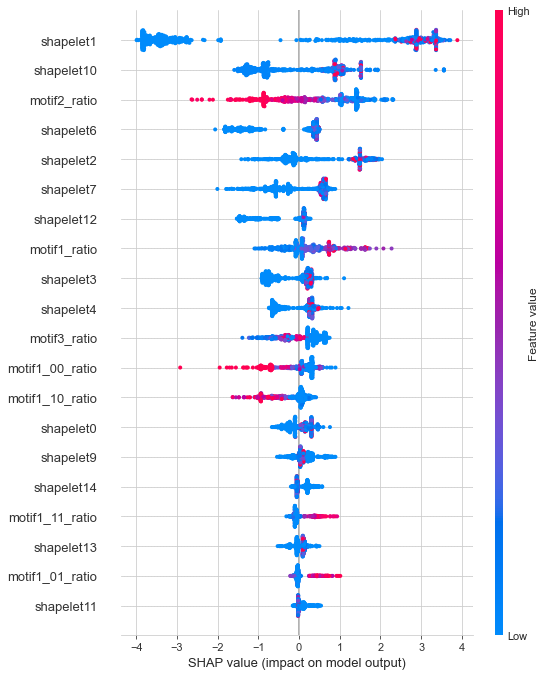

In [19]:
# SHAP解释样本

import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

shap.summary_plot(shap_values, X_test)


The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The `size` parameter has been renamed to `height`; please update your code.


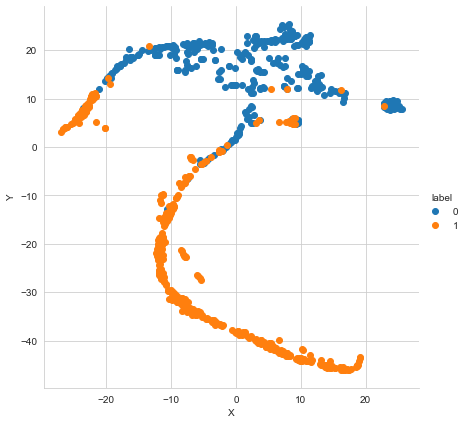

In [20]:
# 对特征画t-SNE图
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(X_test)

tsne_df = pd.DataFrame({'X': tsne_obj[:, 0], 'Y': tsne_obj[:, 1], 'label': y_test})

# 画图
import seaborn as sns

sns.set_style("whitegrid")
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "X", "Y").add_legend()
plt.show()


### shapelets、graphlets、节点特征

In [39]:
# 定义要使用的特征
key_features_name = ['balance', 'count', 'motif1_ratio', 'motif2_ratio', 'motif3_ratio', 'motif1_00_ratio', 'motif1_01_ratio', 'motif1_10_ratio', 'motif1_11_ratio', 'shapelet1', 'shapelet2', 'shapelet3', 'shapelet4', 'shapelet5', 'shapelet6', 'shapelet7', 'shapelet8', 'shapelet9', 'shapelet10', 'shapelet11', 'shapelet12', 'shapelet13', 'shapelet14', 'label']
key_features = features[key_features_name]
key_features.head()

,balance,count,motif1_ratio,motif2_ratio,motif3_ratio,motif1_00_ratio,motif1_01_ratio,motif1_10_ratio,motif1_11_ratio,shapelet1,...,shapelet6,shapelet7,shapelet8,shapelet9,shapelet10,shapelet11,shapelet12,shapelet13,shapelet14,label
0,-0.001092,4,0.500000,0.000000,0.500000,0.00000,0.00000,0.5,0.500,6.634261,...,0.221186,7.257098,0.084964,5.244766,6697.312677,0.338345,0.082171,2.735242,0.823799,0
1,-0.000924,5,0.350000,0.650000,0.000000,1.00000,0.00000,0.0,0.000,6.634261,...,0.221186,7.257098,0.084965,5.244766,6697.328192,0.338345,0.082175,2.735242,0.823799,0
2,0.577721,101,0.029940,0.967066,0.002994,0.65000,0.35000,0.0,0.000,5.655286,...,0.599845,6.681451,0.515605,4.385881,6697.824909,0.681533,0.617439,2.189384,1.014110,0
3,-4.045869,12,0.111111,0.888889,0.000000,0.71875,0.15625,0.0,0.125,6.634261,...,0.221190,7.045676,0.084969,5.244766,6696.942751,0.338345,0.082196,2.735242,0.823799,0
4,-0.000700,3,0.500000,0.000000,0.500000,0.00000,0.00000,1.0,0.000,6.634261,...,0.221187,7.257098,0.084956,5.244766,6697.344891,0.338345,0.082108,2.735242,0.823799,0


In [40]:
# 划分数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(key_features.iloc[:, :-1], key_features.iloc[:, -1], test_size=0.2, random_state=0)

In [41]:
# xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# 预测
y_pred = xgb_model.predict(X_test)

# 评估
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       338
           1       0.99      0.99      0.99       334

    accuracy                           0.99       672
   macro avg       0.99      0.99      0.99       672
weighted avg       0.99      0.99      0.99       672



ntree_limit is deprecated, use `iteration_range` or model slicing instead.


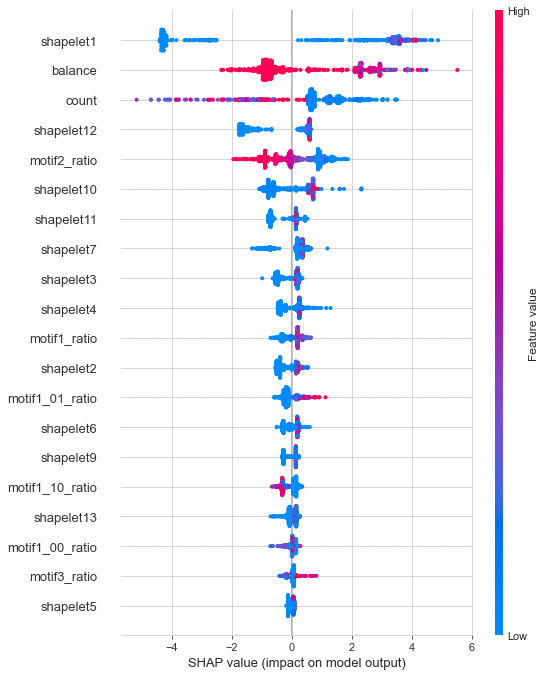

In [42]:
# SHAP解释样本

import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

shap.summary_plot(shap_values, X_test)


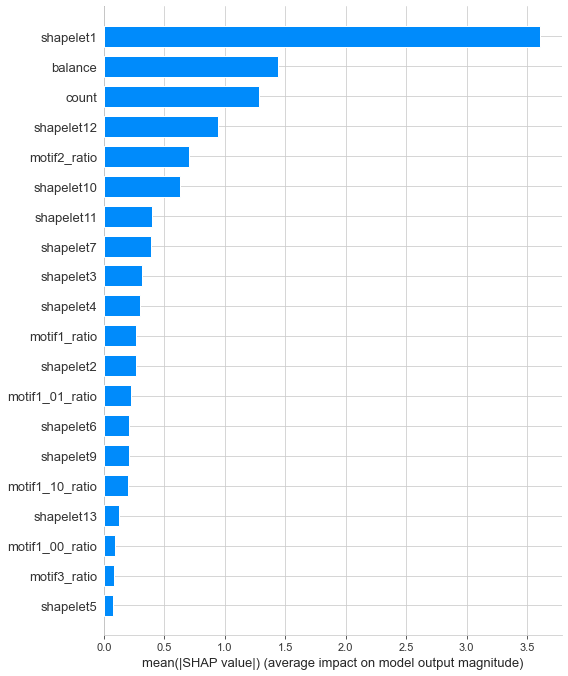

In [43]:
# SHAP输出特征重要性
shap.summary_plot(shap_values, X_test, plot_type="bar")

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The `size` parameter has been renamed to `height`; please update your code.


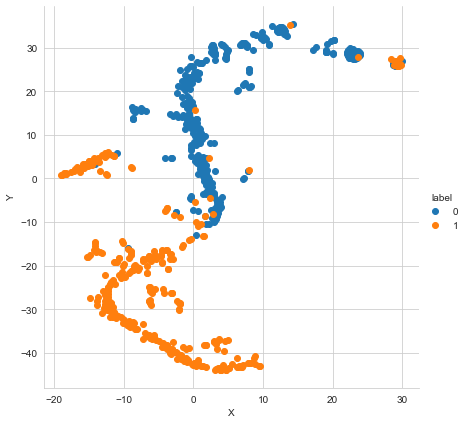

In [44]:
# 对特征画t-SNE图
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(X_test)

tsne_df = pd.DataFrame({'X': tsne_obj[:, 0], 'Y': tsne_obj[:, 1], 'label': y_test})

# 画图
import seaborn as sns

sns.set_style("whitegrid")
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "X", "Y").add_legend()
plt.show()


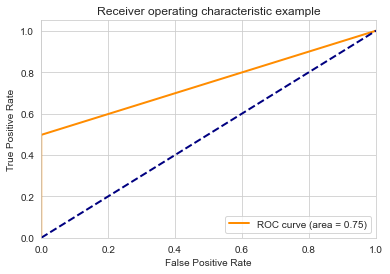

In [46]:
# ROC曲线
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 只使用motif1_00_ratio和shapelet1

In [38]:

key_features_name = ['shapelet1', 'label']
key_features = features[key_features_name]

# 划分数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(key_features.iloc[:, :-1], key_features.iloc[:, -1], test_size=0.2, random_state=0)

# xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# 预测
y_pred = xgb_model.predict(X_test)

# 评估
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.95      0.94       338
           1       0.95      0.94      0.94       334

    accuracy                           0.94       672
   macro avg       0.94      0.94      0.94       672
weighted avg       0.94      0.94      0.94       672



ntree_limit is deprecated, use `iteration_range` or model slicing instead.


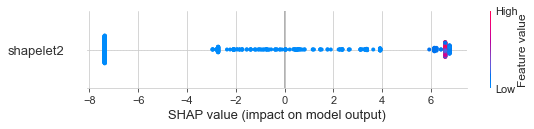

In [36]:
# SHAP解释样本
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

shap.summary_plot(shap_values, X_test)

The `size` parameter has been renamed to `height`; please update your code.


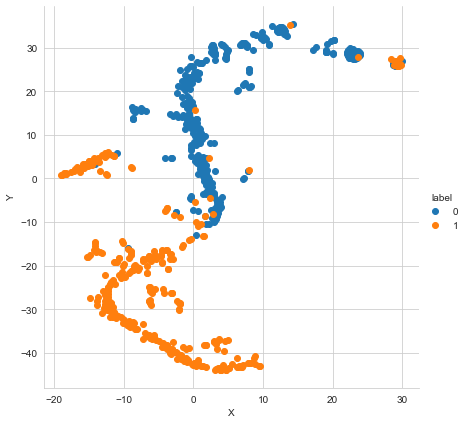

In [37]:
# 画图
import seaborn as sns

sns.set_style("whitegrid")
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "X", "Y").add_legend()
plt.show()